In [2]:
import itertools
import random as rd
import numpy as np
from scipy.optimize import curve_fit
import collections
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline
import networkx as nx
from IPython.display import Image


In [3]:
# Run this only in Colab environment
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/<your_gdrivefolder>/data/'
###############################################################
# for local storage
path = '../notebooks_data/data/'

# Assortativity 

## Tutorial:

## fitting procedure with numpy (polyfit)


Often model parameters need to be fitted to real world data.

In this notebook we are going through a simple example first to learn how the fitting procedure works with `numpy.polyfit`.

Note that numpy is only one way of doing it. For more advanced tasks you can use the `scipy.optimize.curve_fit` 
module.
 
It is also not unusual when different fitting implementations lead to slightly different results. In higher-dimensional parameter landscapes there might be multiple minima plus different optimization procedures to minimize the differnce between the data and your model function can lead to inconsistencies.

We will start very simplke by generating a linear function and add some noise to it pretending it was real data.

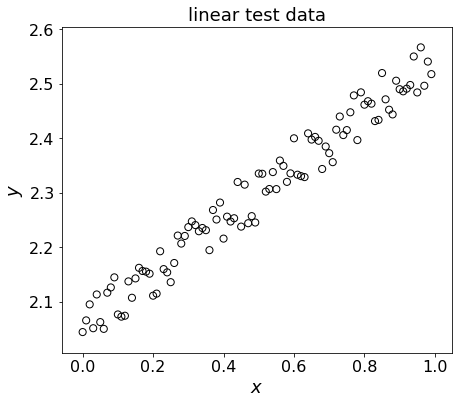

In [4]:
x = np.arange(0,1,.01)

a = .5
b = 2.

y = [(a*z+b)+.1*rd.uniform(0,1) for z in x]

plt.figure(figsize=(7,6))
plt.scatter(x, y, s=50, facecolors='none', edgecolors='k')

plt.title("linear test data",fontsize=18)
plt.ylabel("$y$",fontsize=18)
plt.xlabel("$x$",fontsize=18)
ax = plt.gca()
plt.tick_params(axis='both', which='major', colors='k',labelsize=16)



a=0.52
b=2.05


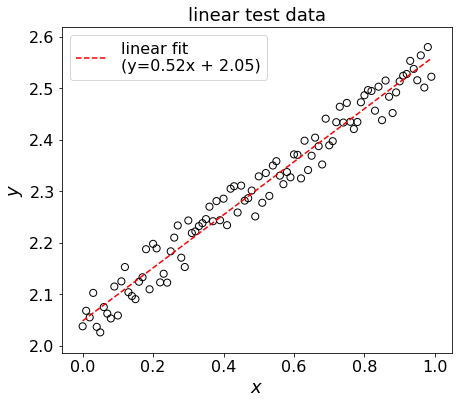

In [104]:
# define model function :
def linear_func(x,a,b):
    return a*x+b

# actual fitting yields optimized parameters a and b
paras = np.polyfit(x, y, 1)
print('a=%.2f' %paras[0])
print('b=%.2f' %paras[1])


x_fit = x
# y_fit = [paras[1]+z*paras[0] for z in x_fit]
y_fit = [linear_func(z,paras[0],paras[1]) for z in x_fit]


plt.figure(figsize=(7,6))
plt.scatter(x, y, s=50, facecolors='none', edgecolors='k')
plt.plot(x_fit,y_fit,'r--',label= 'linear fit \n(y=%.2fx + %.2f)' %(paras[0],paras[1]))
plt.title("linear test data",fontsize=18)
plt.ylabel("$y$",fontsize=18)
plt.xlabel("$x$",fontsize=18)

ax = plt.gca()
plt.tick_params(axis='both', which='major', colors='k',labelsize=16)
plt.legend(fontsize=16)


## Exercise (12pts)

In chapter 7 about `degree correlations` in Barabasi's book you can find Figure 7.6 where for three networks the degree correlation is shown. ([chapter 7](http://networksciencebook.com/chapter/7#measuring-degree))

Recapitulate these three plots.



Consider the three real-world datasets:

`collaboration.edgelist.txt`

`powergrid.edgelist.txt`

`metabolic.edgelist.txt`

and 

1. Compute the average next-nearest neighbor degrees for all occuring degrees. 
2. Plot them over the degrees. (as Fig. 7.6 suggests)
3. Fit the model $<k_{nn}>  ~\propto ~k^\mu$ to the data and measure the exponent $\mu$. Use a linear fitting function here.
4. Do the same for BA and random networks and find $\mu$. (Average over some realizations)
4. Comment briefly the outcome for the latter.